##### Complex Networks II | Tamanna Urmi
* Homework 3
* Date: April 28, 2022


Libraries:

In [1]:

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd


#### 2(a) Exponentially-distributed random variables

In [181]:
# Inverse-CDF sampling

lambd = 0.25
n = np.linspace(1, 10**6, 10**6)
X_sim = []
for i in n:
    X_sim.append( - np.log(1-rnd.uniform(0, 1))/lambd)

len(X_sim)

1000000

In [177]:
def linbin_fx(data):
    b0 = min(data)
    bn = max(data)
    
    # create bins from data
    bin_edges = np.linspace(b0, bn, 30, axis=0)
    data_df = pd.DataFrame(data, columns = ['x'])
    # data_df['y'] = f(data_df['x'])
    
    # linearly bin the data
    lin_binned_dt = pd.cut(data, bin_edges, right=False)
    data_df['bin'] = lin_binned_dt
    
    # calculation various X and the Y
    lin_binned_xy = data_df.groupby(['bin']).agg({'x': ["min", "count"]}).droplevel(axis=1, level=0).reset_index()
    lin_binned_xy.columns = ['bin','X_min','X_cnt']
    lin_binned_xy['X_prob'] = lin_binned_xy.apply(lambda row: row['X_cnt']/(len(data)*(row['bin'].right - row['bin'].left)), axis = 1)

    lin_binned_xy = lin_binned_xy.dropna()
    return lin_binned_xy


In [182]:
X_exd = linbin_fx(X_sim)
X_exd.head()

,bin,X_min,X_cnt,X_prob
0,"[1.02e-05, 2.022)",0.000010,397882,0.196777
1,"[2.022, 4.044)",2.021968,239625,0.118509
2,"[4.044, 6.066)",4.043919,143418,0.070929
3,"[6.066, 8.088)",6.065869,86910,0.042982
4,"[8.088, 10.11)",8.087842,52456,0.025943


In [183]:
### Theoretical distribution
import math

x = np.linspace(0, 55, 55)
y = lambd*math.e**(-lambd*x)


Text(0.5, 1.0, 'Exponential distribution')

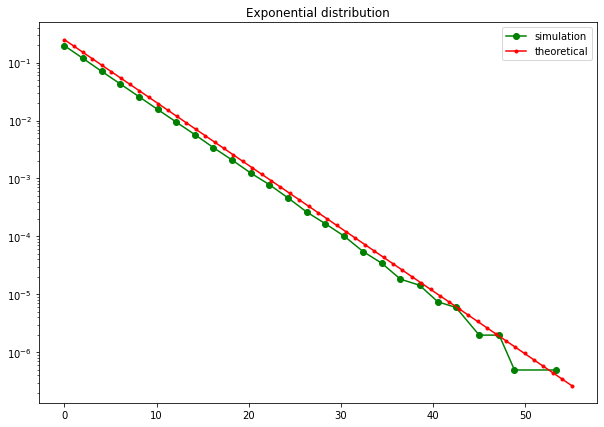

In [184]:
plt.figure(figsize = (10,7))
plt.semilogy(X_exd.X_min, X_exd.X_prob, marker = 'o', color = 'g', label = 'simulation')
plt.semilogy(x, y, marker = '.', color = 'r', label = 'theoretical')
plt.legend()
plt.title('Exponential distribution')

Text(0.5, 1.0, 'Exponential distribution')

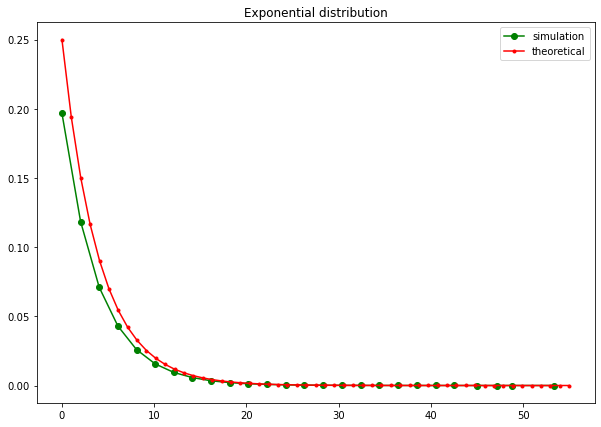

In [185]:
plt.figure(figsize = (10,7))
plt.plot(X_exd.X_min, X_exd.X_prob, marker = 'o', color = 'g', label = 'simulation')
plt.plot(x, y, marker = '.', color = 'r', label = 'theoretical')
plt.legend()
plt.title('Exponential distribution')

#### 2(b) Pareto-distributed random variables

In [138]:
### Inverse-CDF sampling

alpha = 0.25
x_m = 1
n = np.linspace(1, 10**6, 10**6)
X_sim2 = []
for i in n:
    X_sim2.append( x_m*(1 - rnd.uniform(0, 1))**(-1/alpha) )

len(X_sim2)


1000000

In [176]:
def logbin_fx(data, b):
    data = np.array(data)
    data = data[data>0]
    
    b0 = np.log10(min(data))
    print(b0)
    bn = np.log10(max(data))
    print(bn)
    # create bins from data
    bin_edges = np.logspace(b0, bn, num= b + 1, endpoint=True, base=10.0, dtype=None, axis=0)
    data_df = pd.DataFrame(data, columns = ['x'])
    print(len(data))
    # logbin the data
    log_binned_dt = pd.cut(data, bin_edges, right=False)
    data_df['bin'] = log_binned_dt
    
    # calculation various X and the Y
    log_binned_xy = data_df.groupby(['bin']).agg({'x': ["min", "count"]}).droplevel(axis=1, level=0).reset_index()
    log_binned_xy.columns = ['bin', 'X_min', 'X_cnt']
    log_binned_xy['bin_length'] = log_binned_xy.apply(lambda row: row['bin'].right - row['bin'].left, axis = 1)
    log_binned_xy['X_prob'] = log_binned_xy.apply(lambda row: row['X_cnt']/(len(data)*(row['bin'].right - row['bin'].left)), axis = 1)

    log_binned_xy = log_binned_xy.dropna()
    return log_binned_xy


In [69]:
X_pd = logbin_fx(X_sim2, 20)
X_pd.head()

1.4690638993670565e-06
22.099134621061957
1000000


,bin,X_min,X_cnt,bin_length,X_prob
0,"[1.0, 12.734)",1.000003,470546,11.734,4.010107e-02
1,"[12.734, 162.149)",12.733861,248737,149.415,1.664739e-03
2,"[162.149, 2064.769)",162.150435,132242,1902.620,6.950521e-05
3,"[2064.769, 26292.271)",2064.926242,69905,24227.502,2.885357e-06
4,"[26292.271, 334799.466)",26292.433597,36996,308507.195,1.199194e-07


In [49]:
X_pd.bin.iloc[0].length


15.48

In [50]:
X_pd.bin.iloc[0].right - X_pd.bin.iloc[0].left

15.48

In [140]:
### Theoretical distribution

x = np.logspace(0, 22, 20)
y = alpha*x_m**alpha/(x**(alpha + 1))



In [142]:
X_pd

,bin,X_min,X_cnt,bin_length,X_prob
0,"[1.0, 12.734)",1.000003e+00,470546,1.173400e+01,4.010107e-02
1,"[12.734, 162.149)",1.273386e+01,248737,1.494150e+02,1.664739e-03
2,"[162.149, 2064.769)",1.621504e+02,132242,1.902620e+03,6.950521e-05
3,"[2064.769, 26292.271)",2.064926e+03,69905,2.422750e+04,2.885357e-06
4,"[26292.271, 334799.466)",2.629243e+04,36996,3.085072e+05,1.199194e-07
5,"[334799.466, 4263256.027)",3.349163e+05,19705,3.928457e+06,5.015965e-09
6,"[4263256.027, 54287278.734)",4.263875e+06,10349,5.002402e+07,2.068806e-10
7,"[54287278.734, 691281174.278)",5.430456e+07,5305,6.369939e+08,8.328180e-12
8,"[691281174.278, 8802608512.587)",6.913731e+08,2916,8.111327e+09,3.594973e-13
9,"[8802608512.587, 112090303495.95)",8.805158e+09,1506,1.032877e+11,1.458063e-14


Text(0.5, 1.0, 'Pareto Distribution by inverse-CDF simulation')

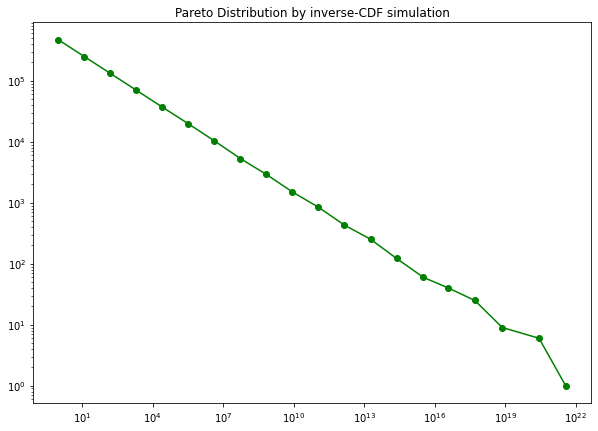

In [70]:
plt.figure(figsize = (10,7))
plt.loglog(X_pd.X_min, X_pd.X_cnt, marker = 'o', color = 'g', label = 'simulation')
plt.title('Pareto Distribution by inverse-CDF simulation')

Text(0.5, 1.0, 'Pareto Distribution')

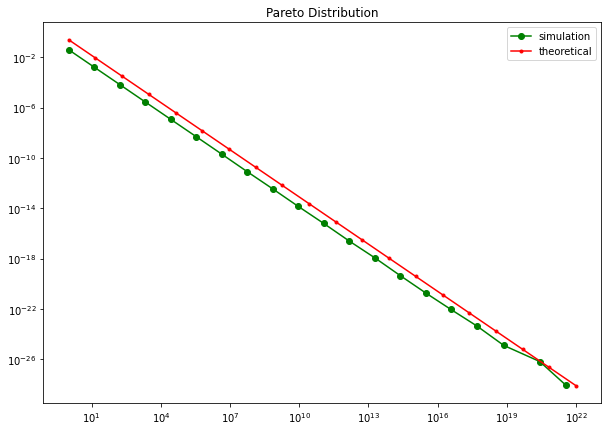

In [143]:
plt.figure(figsize = (10,7))
plt.loglog(X_pd.X_min, X_pd.X_prob, marker = 'o', color = 'g', label = 'simulation')
plt.loglog(x, y,  marker = '.', color = 'r', label = 'theoretical')
plt.legend()
plt.title('Pareto Distribution')



#### Hypersoft configuration model

In [109]:


def hs_config(n, avg_k, gamma):    
    
    ## Hidden variable assignment
    alpha = gamma - 1
    x_0 = (alpha - 1)*avg_k/alpha
    
    x_hidden = np.zeros(n)
    for node in range(n-1):
        x_hidden[node] = x_0/((1 - rnd.uniform(0, 1))**(1/alpha))
        
    ## Creating edges
    E = []  
    d = np.zeros(n)

    for i in range(n-1):
        for j in range(n-1):
            pcutoff = 1/(1+(avg_k*n)/(x_hidden[i]*x_hidden[j]))
            pconnect = rnd.uniform(0, 1)
            if (pconnect < pcutoff) & (int(i) < int(j)):
                E.append((int(i), int(j)))
                d[int(i)] += 1
                d[int(j)] += 1
    return E, d
    
    

In [58]:
E, d = hs_config(15, 3, 0.091)

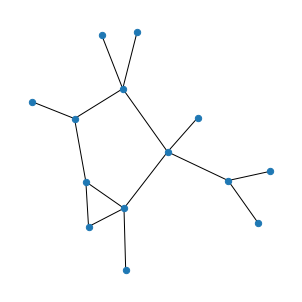

In [60]:
e, d = hs_config(15, 3, 0.2)
G2 = nx.Graph()
G2.add_edges_from(e)
fig = plt.figure(figsize=(4,4))
nx.draw_spring(G2, node_size=40)

#### Hypercanonical ER model

In [38]:

def hc_ER(n, avg_k, gamma):
    alpha = gamma - 1
    
    x_0 = (alpha - 1)*avg_k/alpha
    K = x_0/((1 - rnd.uniform(0, 1))**(1/alpha))
    p = min(1, K/n)
    E = []  
    d = np.zeros(n)


    for i in range(n-1):
        for j in range(n-1):
            pcutoff = p
            pconnect = np.random.rand()
            if (pconnect < pcutoff) & (int(i) < int(j)):
                E.append((int(i), int(j)))
                d[int(i)] += 1
                d[int(j)] += 1
    d = d[d>0]
    return E, d


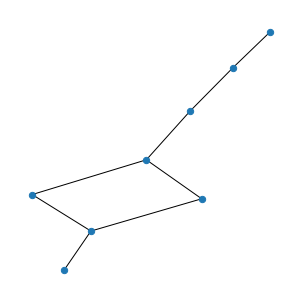

In [33]:
E, d = hc_ER(10, 3, 0.2)
G = nx.Graph()
G.add_edges_from(E)
fig = plt.figure(figsize=(4,4))
nx.draw_spring(G, node_size=40)


In [61]:
### 10 HSCM graphs

hs_config_edge_lists = {}
hs_config_degrees = {}
for i in range(10):
    e, d = hs_config(1000, 10, 3)
    hs_config_edge_lists[i] = e
    hs_config_degrees[i] = d
    print(i)
    

0
1
2
3
4
5
6
7
8
9


In [112]:
#### 10^4 HER graphs

hc_er_edge_lists = {}
hc_er_degrees = {}
for i in range(10**4):
    e, d = hc_ER(1000, 10, 3)
    hc_er_edge_lists[i] = e
    hc_er_degrees[i] = d
    if i % 1000 == 0:
        print(i)
    

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [113]:
hs_config_degrees_list = np.concatenate(np.array([v for v in hs_config_degrees.values()]))
hs_config_degrees_list
hc_er_degrees_list = np.concatenate(np.array([v for v in hc_er_degrees.values()]))
hc_er_degrees_list

/var/folders/3x/2jygx_494rq5s1llg74g9nhw0000gn/T/ipykernel_26881/621303049.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  hs_config_degrees_list = np.concatenate(np.array([v for v in hs_config_degrees.values()]))
/var/folders/3x/2jygx_494rq5s1llg74g9nhw0000gn/T/ipykernel_26881/621303049.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  hc_er_degrees_list = np.concatenate(np.array([v for v in hc_er_degrees.values()]))


array([10.,  9., 12., ..., 14.,  7., 11.])

In [126]:
hscm_deg_binned = logbin_fx(hs_config_degrees_list, 20)
hscm_deg_binned

0.3010299956639812
2.6541765418779604
9846


,bin,X_min,X_cnt,bin_length,X_prob
0,"[2.0, 2.622)",2.0,287,0.622,0.046863
1,"[2.622, 3.438)",3.0,587,0.816,0.073061
2,"[3.438, 4.508)",4.0,863,1.070,0.081916
3,"[4.508, 5.911)",5.0,1018,1.403,0.073694
4,"[5.911, 7.75)",6.0,2190,1.839,0.120949
5,"[7.75, 10.162)",8.0,2251,2.412,0.094785
6,"[10.162, 13.324)",11.0,1092,3.162,0.035075
7,"[13.324, 17.47)",14.0,646,4.146,0.015825
8,"[17.47, 22.906)",18.0,352,5.436,0.006577
9,"[22.906, 30.033)",23.0,258,7.127,0.003677


In [127]:
hcer_deg_binned = logbin_fx(hc_er_degrees_list, 20)
hcer_deg_binned

0.3010299956639812
2.931457870689005
9874219


,bin,X_min,X_cnt,bin_length,X_prob
0,"[2.0, 2.707)",2.0,285160,0.707,4.084759e-02
1,"[2.707, 3.665)",3.0,558096,0.958,5.899846e-02
2,"[3.665, 4.961)",4.0,838316,1.296,6.550885e-02
3,"[4.961, 6.716)",5.0,2132972,1.755,1.230850e-01
4,"[6.716, 9.092)",7.0,2702416,2.376,1.151869e-01
5,"[9.092, 12.307)",10.0,1430719,3.215,4.506824e-02
6,"[12.307, 16.66)",13.0,853149,4.353,1.984876e-02
7,"[16.66, 22.553)",17.0,509851,5.893,8.762017e-03
8,"[22.553, 30.53)",23.0,254772,7.977,3.234516e-03
9,"[30.53, 41.328)",31.0,139490,10.798,1.308269e-03


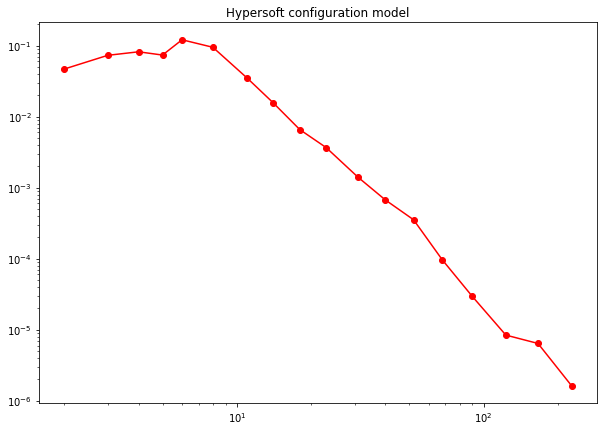

<Figure size 432x288 with 0 Axes>

In [131]:
plt.figure(figsize = (10,7))
plt.loglog(hscm_deg_binned.X_min, hscm_deg_binned.X_prob, marker = 'o', color = 'r', label = 'Hypersoft configuration model')

plt.title('Hypersoft configuration model')
plt.show()
plt.savefig('hscm.png')


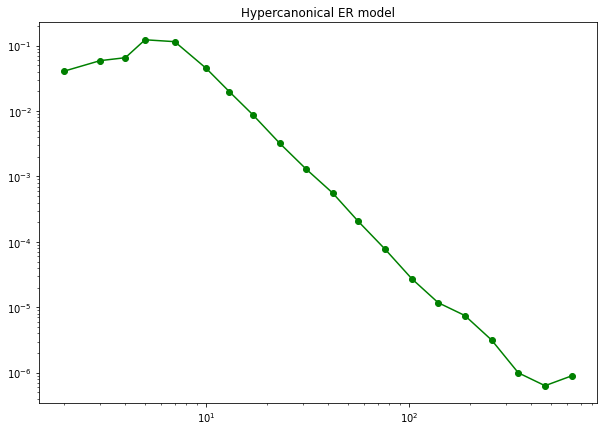

In [132]:

plt.figure(figsize = (10,7))
plt.loglog(hcer_deg_binned.X_min, hcer_deg_binned.X_prob, marker = 'o', color = 'g', label = 'Hypercanonical ER model')
plt.title('Hypercanonical ER model')
plt.savefig('her.png')
plt.show()


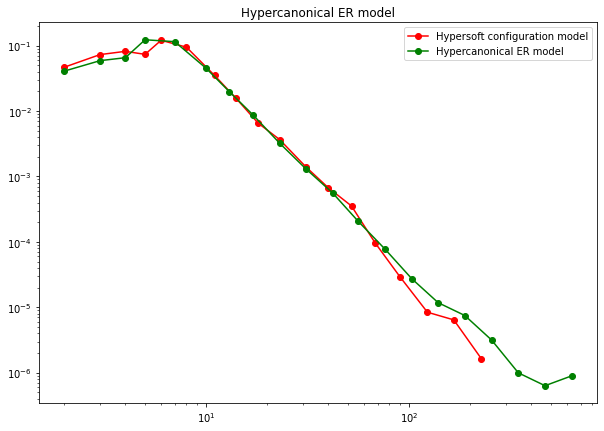

In [133]:

plt.figure(figsize = (10,7))
plt.loglog(hscm_deg_binned.X_min, hscm_deg_binned.X_prob, marker = 'o', color = 'r', label = 'Hypersoft configuration model')
plt.loglog(hcer_deg_binned.X_min, hcer_deg_binned.X_prob, marker = 'o', color = 'g', label = 'Hypercanonical ER model')
plt.title('Hypercanonical ER model')
plt.legend()
plt.savefig('hscm_and_her.png')
plt.show()


In [178]:
e, d_HSCM = hs_config(1000, 10, 3)
e, d_HER = hc_ER(1000, 10, 3)
HSCM_binned = logbin_fx(d_HSCM, 20)
HER_binned = linbin_fx(d_HER)

0.0
2.037426497940624
997


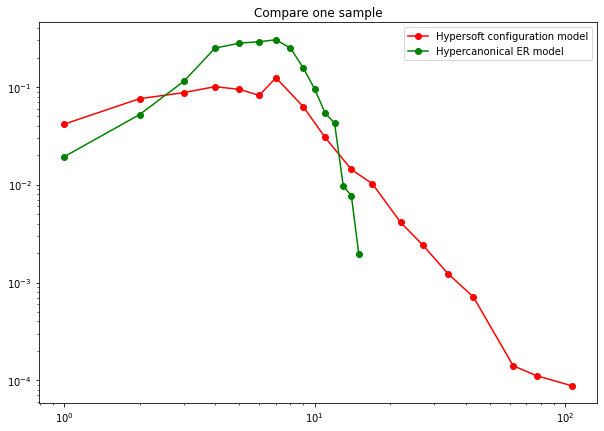

In [180]:

plt.figure(figsize = (10,7))
plt.loglog(HSCM_binned.X_min, HSCM_binned.X_prob, marker = 'o', color = 'r', label = 'Hypersoft configuration model')
plt.plot(HER_binned.X_min, HER_binned.X_prob, marker = 'o', color = 'g', label = 'Hypercanonical ER model')
plt.title('Compare one sample')
plt.legend()

plt.show()
